### Import Necessary Module and Set Path 

In [4]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [5]:
import analysis as an

## Run Cyclus Input file

In [ ]:
! rm cyclus.sqlite
! cyclus france_only.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          cyclus.sqlite

## This python notebook is only to  generate the power plot that shows the french transition to SFRs. The result of material flow should be ignored.

In [16]:
import matplotlib.pyplot as plt
import os

base = an.get_cursor('0ext.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(base)

# get power / number timeseries
base_dict = an.get_power_dict(base)
an.plot_power(base)
os.rename('power_plot.png', 'base.png')

file_list = ['5ext.sqlite', '10ext.sqlite', '20ext.sqlite']

lwr_diff_dict = {}
lwr_dict = {}
fr_diff_dict = {}
fr_dict = {}
for file in file_list:
    cursor = an.get_cursor(file)
    an.plot_power(cursor)
    os.rename('power_plot.png', file + '.png')

for file in file_list:
    cursor = an.get_cursor(file)
    power_dict = an.get_power_dict(cursor)
    lwr_dict[file.replace('.sqlite', '')] = power_dict['lwr']
    lwr_diff = [x-y for x,y in zip(power_dict['lwr'], base_dict['lwr'])]
    lwr_diff_dict[file.replace('.sqlite', '')] = lwr_diff
    
    fr_dict[file.replace('.sqlite','')] = power_dict['FR']
    fr_diff = [x-y for x,y in zip(power_dict['FR'], base_dict['FR'])]
    fr_diff_dict[file.replace('.sqlite', '')] = fr_diff
    

years = an.timestep_to_years(init_year, timestep)
for key in lwr_diff_dict:
    plt.plot(years, lwr_diff_dict[key], label=key)
plt.ylabel('Installed Capacity [MWe]')
plt.title('LWR Capacity Difference from Base Case')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.savefig('lwr_diff.png', format='png', bbox_inches='tight')
plt.close()
        
for key in fr_diff_dict:
    plt.plot(years, fr_diff_dict[key], label=key)
plt.ylabel('Installed Capacity [MWe]')
plt.title('FR Capacity Difference from Base Case')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.savefig('fr_diff.png', format='png', bbox_inches='tight')
plt.close()


for key in fr_diff_dict:
    ratio_timeseries = [x/y for x,y in zip(fr_dict[key], lwr_dict[key])]
    z = 0
    for i in ratio_timeseries:
        if i > 1:
            ratio_timeseries[z] = 1
        z= z+1
    plt.plot(years, ratio_timeseries, label=key)
plt.ylabel('FR to LWR Capacity Ratio[MWe]')
plt.title('FR to LWR Capacity Ratio')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.savefig('pow_ratio.png', format='png', bbox_inches='tight')
plt.close()

Sink_Source_Inst has no values


/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Sink_Source_Inst has no values
Sink_Source_Inst has no values
Sink_Source_Inst has no values
Sink_Source_Inst has no values
Sink_Source_Inst has no values
Sink_Source_Inst has no values
Sink_Source_Inst has no values


/home/dkadkf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [13]:

for key in fr_diff_dict:
    ratio_timeseries = [x/y for x,y in zip(fr_dict[key], lwr_dict[key])]
    z = 0
    for i in ratio_timeseries:
        if i > 1:
            ratio_timeseries[z] = 1
        z= z+1
    print(len(ratio_timeseries))
    plt.plot(years, ratio_timeseries, label=key)
plt.ylabel('FR to LWR Capacity Ratio[MWe]')
plt.title('FR to LWR Capacity Ratio')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.savefig('pow_ratio.png', format='png', bbox_inches='tight')
plt.close()

2280
2280
2280


/home/dkadkf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [14]:
power_dict = {}
power_cum ={}
entered = cur20.execute('SELECT entertime, max(value) FROM '
                      'agententry INNER JOIN timeseriespower '
                      'ON agententry.agentid = timeseriespower.agentid '
                      'WHERE parentid = 86 '
                      'GROUP BY agententry.agentid').fetchall()
init_year, init_month, duration, timestep = an.get_timesteps(cur20)
power_dict['power'] = an.get_timeseries(entered, duration, False)
power_cum['power'] = an.get_timeseries_cum(entered, duration, False)
power_dict['power'] = [x/600 for x in power_dict['power']]
power_cum['power'] = [x/600 for x in power_cum['power']]
                                     
an.double_axis_bar_line_plot(power_dict, power_cum, timestep, 'Year', 'Num Reactors Deployed', 'Cumulative Number', '20ext', '20ext', init_year)

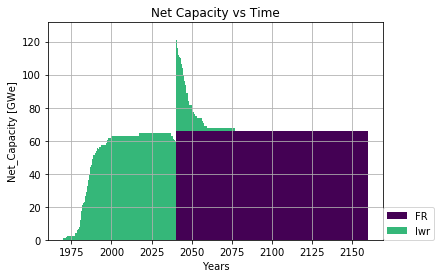

In [4]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')